# A Gentle Introduction to Probability Density Estimation 

### 1- Summarize Density With a Histogram


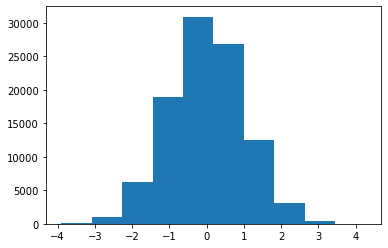

In [8]:
import matplotlib.pyplot as plt
import numpy as np
#generate the sample 
sample = np.random.normal(size=100000)
#plot a histogram of sample
plt.hist(sample,bins=10)
plt.show()

### 2- Parametric Density Estimation

Mean=-0.000, Standard Deviation=0.010


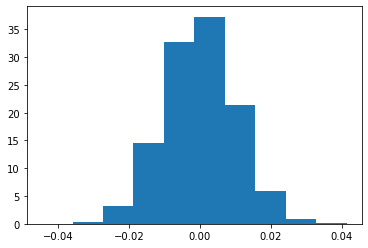

In [10]:
# generate
sample = np.random.normal(loc=0,scale=0.01,size=100000)
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean,sample_std))
# define the distribution
from scipy.stats import norm
dist = norm(sample_mean,sample_std)
# sample probabilities for a range of outcomes
values = [value for value in range(-1,1)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
#plt.plot(values, probabilities)
plt.show()

## 3- Nonparametric Density Estimation


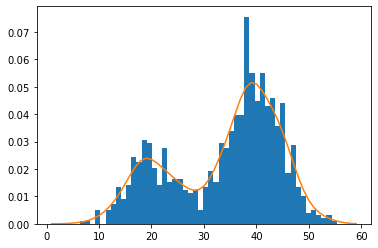

In [6]:
# example of bimodal data sample
from sklearn.neighbors import KernelDensity
# generate sample
sample1 = np.random.normal(loc=20,scale=5,size=300)
sample2 = np.random.normal(loc=40,scale=5,size=700)
sample = np.hstack((sample1,sample2)) #mix distribution
# fit density
model = KernelDensity(bandwidth=2,kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
# values equal the observation range
values = np.asarray([value for value in range(1,60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
#print(probabilities)
probabilities = np.exp(probabilities)
#print(probabilities)
# plot the histogram
plt.hist(sample,bins=50, density=True)

plt.plot(values[:],probabilities)
plt.show()

[ 0.17347103  0.81673277  2.3075578  ... -0.12838374  0.62643879
 -2.98424666]
Mean=-0.001, Standard Deviation=1.002


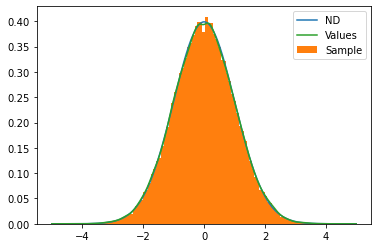

In [7]:
# Formula of the normal distribution
import math
def formula_normal_distribution(loc,scale,sample):
    results= []
    for value in sample:
        f = (1/(math.sqrt(2*math.pi)*scale)) * math.exp(-0.5*(value-loc)**2/scale**2)
        results.append(f)
    return results

dist = np.arange(-5,5,0.01)

result_formula = formula_normal_distribution(0,1,dist)
#print(result_formula)
""" results_formula1=formula(loc=20,scale=5,sample=sample1)
results_formula2=formula(loc=40,scale=5,sample=sample2) 
result_formula = np.hstack((results_formula1,results_formula2)) """
#probabilities = model.score_samples(result_formula)
plt.plot(dist,result_formula,label='ND')
#plt.hist(sample,bins=50, density=True)

#plt.plot(result_formula)
#print(result_formula)

# generate 
sample = np.random.normal(loc=0,scale=1,size=100000)
print(sample)
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean,sample_std))
# define the distribution
from scipy.stats import norm
#dist = norm(sample_mean,sample_std)
# sample probabilities for a range of outcomes
#values = [value for value in range(-1,1)]
#probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
#plt.hist(sample, bins=100, density=True)
#plt.plot(values, probabilities)
#plt.show()

model = KernelDensity(bandwidth=0.1,kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
# values equal the observation range
values = np.asarray([value for value in np.arange(-5,5,0.01)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
#print(probabilities)
probabilities = np.exp(probabilities)
#print(probabilities)
# plot the histogram
plt.hist(sample,bins=100, density=True, label='Sample')
plt.plot(values[:],probabilities,label='Values')
plt.legend()
plt.show()